# Cambiamento Climatico

Fonti:

1. Osservatorio Mauna Loa, Hawaii (NOAA-ESRL) https://www.esrl.noaa.gov/gmd/ccgg/trends/data.html

### 1. Ultimo valore di concentrazione Anidrire Carbonica (CO2)

Unità di misura: in ppm

Fonte: Osservatorio Mauna Loa, Hawaii (NOAA-ESRL)

In [1]:
# Import Librerie
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
plt.style.use('ggplot')
get_ipython().magic('pylab inline')

dir_out = os.path.abspath('')

Populating the interactive namespace from numpy and matplotlib


In [2]:
def last_value():
    #Leggo il file messo a disposizione da Mauna Loa
    url="ftp://aftp.cmdl.noaa.gov/products/trends/co2/co2_mm_mlo.txt"
    columns = ['Anno','Mese','Data Decimale','Media CO2','Interpolato','Trend','#days']
    co2_mese = pd.read_csv(url,comment='#',sep = '\s+', names=columns)
    # Seleziono Ultimo Valore
    last_co2 = co2_mese.iloc[-1:]['Media CO2'].values[0]
    last_anno = co2_mese.iloc[-1:]['Anno'].values[0]
    last_mese = co2_mese.iloc[-1:]['Mese'].values[0]
    print('Ultimo Valore Medio: {} ppm\n Anno : {}\n Mese : {}\n'.format(last_co2, last_anno, last_mese))
    
    # Seleziono Primo Valore
    first_co2 = co2_mese.iloc[1:]['Media CO2'].values[0]
    first_anno = co2_mese.iloc[1:]['Anno'].values[0]
    first_mese = co2_mese.iloc[1:]['Mese'].values[0]
    print('Primo Valore Medio: {} ppm\n Anno : {}\n Mese : {}'.format(first_co2, first_anno, first_mese))

In [ ]:
last_value()

### 2. Trend annuale di concentrazione Anidrire Carbonica (CO2)

Unità di misura: in ppm

Fonte: Osservatorio Mauna Loa, Hawaii (NOAA-ESRL)

In [40]:
def trend():
    #Leggo il file messo a disposizione da Mauna Loa
    url="ftp://aftp.cmdl.noaa.gov/products/trends/co2/co2_annmean_mlo.txt"
    columns = ['Anno','Media CO2','unc']
    co2_anno = pd.read_csv(url,comment='#',sep = '\s+', names=columns)
    del co2_anno['unc']
    co2_anno = co2_anno.set_index(['Anno'])
    
    #Grafico
    tp = co2_anno.plot(kind='line',
               legend = False)
    tp.set_xlabel("")
    tp.set_ylabel("Trend Concentrazione CO2 (ppm
                 )")
    fig_posts = tp.get_figure()
    fig_posts.tight_layout()
    fig_posts.savefig(os.path.join(dir_out,'trend_co2.png'), format='png', dpi=1000)

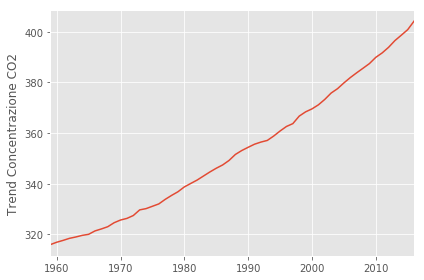

In [42]:
trend()

### 3. Incremento temperatura terrestre
https://data.giss.nasa.gov/gistemp/tabledata_v3/ZonAnn.Ts+dSST.txt

In [82]:
#Leggo il file messo a disposizione da Mauna Loa
url="https://data.giss.nasa.gov/gistemp/tabledata_v3/ZonAnn.Ts+dSST.txt"
global_temp = pd.read_csv(url, skiprows=8, nrows=21,sep = '\s+', header=0)
global_temp1 = pd.read_csv(url, skiprows=32, nrows=20,sep = '\s+', header=0)
global_temp2 = pd.read_csv(url, skiprows=55, nrows=20,sep = '\s+', header=0)
global_temp = global_temp.append(global_temp1).append(global_temp2)

In [83]:
global_temp

,Year,Glob,NHem,SHem,-90N,-24N,-24S,-90N.1,-64N,-44N,-24N.1,-EQU,-24S.1,-44S,-64S,Year.1
0,1880,-20,-34,-6,-42,-14,-6,-107,-62,-21,-22,-7,-3,-8,34,1880
1,1881,-11,-19,-3,-31,0,-6,-76,-46,-13,-2,1,-7,-3,31,1881
2,1882,-10,-18,-2,-23,-8,3,-145,-25,-1,-8,-9,3,8,36,1882
3,1883,-20,-30,-9,-36,-21,-3,-40,-62,-18,-21,-20,-1,0,31,1883
4,1884,-27,-42,-13,-56,-16,-12,-137,-61,-38,-18,-15,-15,-5,35,1884
5,1885,-31,-41,-22,-60,-17,-21,-121,-70,-40,-10,-24,-27,-7,33,1885
6,1886,-30,-39,-22,-48,-24,-21,-126,-45,-36,-23,-25,-18,-21,22,1886
7,1887,-33,-36,-29,-46,-27,-27,-159,-55,-18,-21,-32,-24,-29,15,1887
8,1888,-20,-22,-18,-42,8,-34,-145,-47,-20,9,7,-30,-38,11,1888
9,1889,-11,-16,-7,-26,5,-18,-89,-17,-18,1,10,-16,-17,14,1889


### 4. Emissioni di CO2 per Paese

https://it.wikipedia.org/wiki/Stati_per_emissioni_di_CO2